# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [130]:
# import all of the necessary libraries for gathering and doing my initial analysis
import pandas as pd
import numpy as np
import requests
import os
import json
import glob

In [131]:
# read in the first file I have on had and take a quick look at the contents of the file
dogs_df = pd.read_csv('twitter-archive-enhanced.csv')
dogs_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [132]:
# Create a folder for the second file i'll be downloading 
folder_name = 'project_files'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [133]:
# download the second flat file and check that the response is okay
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [134]:
# Write the file into my directory
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [135]:
# Check that the file is in my directory
os.listdir(folder_name)

['image-predictions.tsv']

In [136]:
# read in the tsv file and take a quick look at its contents
image_pred_df = pd.read_csv('project_files/image-predictions.tsv', sep = '\t')
image_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [137]:
import tweepy 

consumer_key = 'REDACTED'
consumer_secret = 'REDACTED'
access_token = 'REDACTED'
access_secret = 'REDACTED'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)

In [138]:
# I need to query the additional data, store it as a text file, and make a dataframe of that txt file data. 
# Specifically, the tweet id, retweet counts, and the favorite counts for each tweet ID from the prior two tables.

In [139]:
if False: # Using if False so I don't get stopped out by the API rate limit when I need to restart kernel & output
    count = 0
    fails_dict = {}
    #start = timer()
    # Save each tweet's returned JSON as a new line in a .txt file
    with open('tweet_json.txt', 'w') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for t_id in dogs_df['tweet_id']:
            count += 1
            print(str(count) + ": " + str(t_id))
            try:
                tweet = api.get_status(t_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[t_id] = e
                pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [140]:
# Convert the messy string .txt file into more readable JSON format to find the keys I'll need for later to create
# the dataframe
with open('tweet_json.txt', encoding = 'utf-8', mode = 'r') as json_file:
    for tweet in json_file:
        data = json.loads(tweet)

In [141]:
# Sort the keys to get a clearer look at them all
sorted(data.keys())

['contributors',
 'coordinates',
 'created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'favorite_count',
 'favorited',
 'full_text',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'retweet_count',
 'retweeted',
 'source',
 'truncated',
 'user']

In [142]:
# Build a list of dictionaries to create a new dataframe
df_list = []
with open('tweet_json.txt', encoding = 'utf-8', mode = 'r') as json_file:
    for each_tweet in json_file:
        data = json.loads(each_tweet)
        tweet_ID = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        df_list.append({'tweet_id': str(tweet_ID),
                        'retweet_count': int(retweet_count),
                        'favorite_count': int(favorite_count)})
        
twitter_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [143]:
dogs_df.tweet_id.count(), image_pred_df.tweet_id.count(), twitter_df.tweet_id.count()

(2356, 2075, 2328)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



**-VISUAL ASSESSMENT-**

In [144]:
# Quick look at the first 5 rows
dogs_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [145]:
# Taking a look at the last 5 rows
dogs_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [146]:
# Repeatedly browsing over the dataset using random sample data to see if any errors stand out
dogs_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2241,667915453470232577,NaN,NaN,2015-11-21 04:00:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Otis. He is a Peruvian Quartzite. Pic sponsored by Planters. Ears on point. Killer sunglasses. 10/10 ily Otis https://t.co/tIaaBIMlJN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667915453470232577/photo/1,10,10,Otis,None,None,None,None
322,834167344700198914,NaN,NaN,2017-02-21 22:26:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sunshine. She doesn't believe in personal space. Eyes pretty far apart for a dog. Has horns (whoa). 11/10 would pet with wonder https://t.co/o3bhLguymB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834167344700198914/photo/1,11,10,Sunshine,None,None,None,None
101,872668790621863937,NaN,NaN,2017-06-08 04:17:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @loganamnosis: Penelope here is doing me quite a divertir. Well done, @dog_rates! Loving the pupdate. 14/10, je jouerais de nouveau. htt…",8.726576e+17,154767397.0,2017-06-08 03:32:35 +0000,https://twitter.com/loganamnosis/status/872657584259551233/photo/1,14,10,None,None,None,None,None
205,852912242202992640,NaN,NaN,2017-04-14 15:51:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Benny. He likes being adorable and making fun of you while you're on the trampoline. 12/10 let's help him out\n\nhttps://t.co/aVMjBqAy1x https://t.co/7gx2LksT3U,NaN,NaN,NaN,"https://www.gofundme.com/bennys-medical-bills,https://twitter.com/dog_rates/status/852912242202992640/photo/1,https://twitter.com/dog_rates/status/852912242202992640/photo/1",12,10,Benny,None,None,None,None
1608,685641971164143616,NaN,NaN,2016-01-09 01:59:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Otis. He just passed a cop while going 61 in a 45. Very nervous pupper. 7/10 https://t.co/jJS8qQeuNO,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685641971164143616/photo/1,7,10,Otis,None,None,pupper,None


In [147]:
# Check for row-wise issues for dogs that only have "a" as their name 
dogs_df.query('name == "a"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1",13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747885874273214464/photo/1,https://twitter.com/dog_rates/status/747885874273214464/photo/1",8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/746872823977771008/photo/1,https://twitter.com/dog_rates/status/746872823977771008/photo/1",11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593470234624/photo/1,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687239008257/photo/1,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a taco. We only rate dogs. Please o

In [148]:
# Check for row-wise issues for dogs that only have "None" as their name 
dogs_df.query('name == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/video/1,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a well-established sunblockerspaniel. Lost his other flip-flop. 6/10 not very waterproof https://t.co/3RU6x0vHB7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916733198337/photo/1,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Let's hope this flight isn't Malaysian (lol). What a dog! Almost completely camouflaged. 10/10 I trust this pilot https://t.co/Yk6GHE9tOY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100786774016/photo/1,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a northern speckled Rhododendron. Much sass. Gives 0 fucks. Good tongue. 9/10 would caress sensually https://t.co/ZoL8kq2XFx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193221509120/photo/1,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None


In [149]:
dogs_df['timestamp'].sample(10)

1503    2016-01-26 16:12:33 +0000
2037    2015-12-01 05:26:34 +0000
1526    2016-01-22 03:24:22 +0000
979     2016-07-04 15:00:45 +0000
660     2016-10-26 16:14:55 +0000
1212    2016-03-31 00:58:29 +0000
693     2016-10-14 16:13:10 +0000
1864    2015-12-11 17:12:48 +0000
440     2017-01-13 15:08:56 +0000
2315    2015-11-17 18:56:35 +0000
Name: timestamp, dtype: object

**-PROGRAMMATIC ASSESSMENT-**

In [150]:
# Take a broad look at the datatypes and content for the dataset
dogs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [151]:
# Check if the dataframe is missing any data
dogs_df.isna().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

It seems that there is a substantial amount of missing data in the reply and retweeet related columns as well as some in the expanded_urls. This doesn't raise any alarms about the data though because its not expected that every tweet is going to have replies and/or retweets.

In [152]:
# Check if the dataframe has any duplicated data
dogs_df.duplicated().sum()

0

In [153]:
# The expected only denominator is 10, for a consistent rating scale. Let's see if that's the case.
dogs_df.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [154]:
# What does the range of rating numerators look like 
dogs_df.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

**The numerators and denominators being seperate is fine because the WeRateDogs twitter account purposel doesn't use a standardized rating systems; a feature that's part of their appeal. Combining the numerators and denominators into fractions would go against some standard data tidiness principles and it actually works out better that the fractions are split.**

In [155]:
# Taking a look at three aggregations to get an idea of the range and most common score
dogs_df.rating_numerator.agg(['min', 'max', 'mean'])

min     0.000000   
max     1776.000000
mean    13.126486  
Name: rating_numerator, dtype: float64

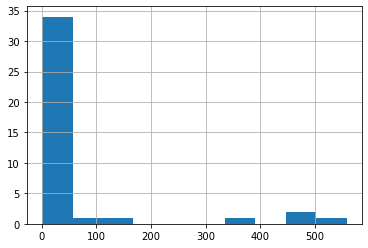

In [156]:
dogs_df.rating_numerator.value_counts().hist();

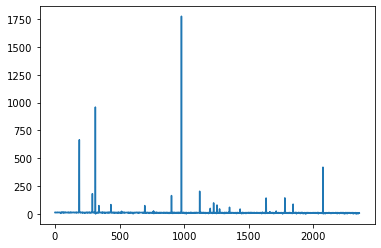

In [157]:
# A quick look at how the numerators are distributed
dogs_df.rating_numerator.plot();

In [158]:
# Querying for the number of unique dog names
dogs_df.name.nunique()

957

In [159]:
# What are the most common dog names?
dogs_df.name.value_counts()

None            745
a               55 
Charlie         12 
Lucy            11 
Oliver          11 
                .. 
Barry           1  
Sobe            1  
Newt            1  
unacceptable    1  
Dot             1  
Name: name, Length: 957, dtype: int64

In [160]:
# Percentage break down of the names throughout the dataset
dogs_df.name.value_counts(normalize=True)

None            0.316214
a               0.023345
Charlie         0.005093
Lucy            0.004669
Oliver          0.004669
                  ...   
Barry           0.000424
Sobe            0.000424
Newt            0.000424
unacceptable    0.000424
Dot             0.000424
Name: name, Length: 957, dtype: float64

**It appears that when extracting the names each dog's name there were issues when a name wasn't explicity stated.**

In [161]:
dogs_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


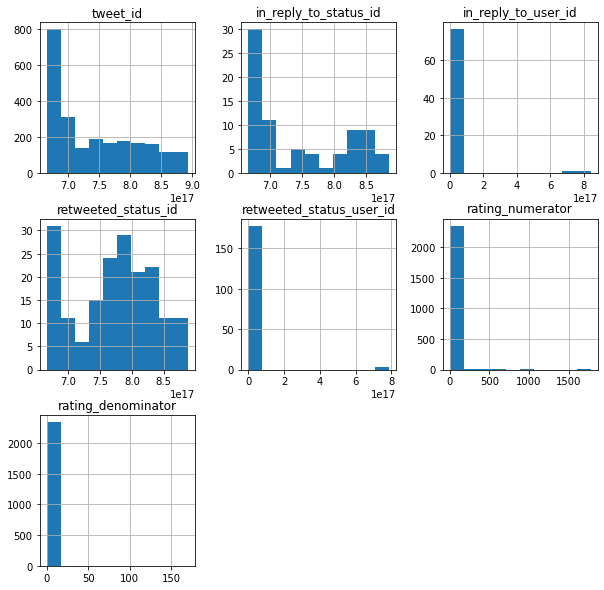

In [162]:
# Basic visualizations of numerical features
dogs_df.hist(figsize = (10,10));

In [163]:
# Retweets are duplicated data/reposts but replies can be more slightly trickier in that someone can post an
# original rating and picture in a reply.
dogs_df[dogs_df.loc[:,:].in_reply_to_status_id.isnull()==False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After countless hours of research and hundreds of formula alterations we have concluded that Dug should be bumped to an 11/10,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tessa. She is also very pleased after finally meeting her biological father. 10/10 https://t.co/qDS1aCqppv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438988365824/photo/1,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [164]:
# Change the column width so that all text in cutoff text fields can be displayed
pd.set_option('display.max_colwidth', -1)

<ipython-input-164-c27fd482a3e2>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [165]:
# Cycle through the 78 rows of actual replies several times and see what the text looks like. It looks like the
# vast majority of the rows don't have original ratings, mostly just commentary.
dogs_df[dogs_df.loc[:,:].in_reply_to_status_id.isnull()==False].sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
1892,674754018082705410,6.747522e+17,4.196984e+09,2015-12-10 00:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Just received another perfect photo of dogs and the sunset. 12/10 https://t.co/9YmNcxA2Cc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674754018082705410/photo/1,12,10,None,None,None,None,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1474,693644216740769793,6.936422e+17,4.196984e+09,2016-01-31 03:57:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",BREAKING PUPDATE: I've just been notified that (if in U.S.) this dog appears to be operating the vehicle. Upgraded to 10/10. Skilled af,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
1464,694356675654983680,6.706684e+17,4.196984e+09,2016-02-02 03:08:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This pupper only appears through the hole of a Funyun. Much like Phineas, this one is also mysterious af. 10/10 https://t.co/SQsEBWxPyG",NaN,NaN,NaN,https://twitter.com/dog_rates/status/694356675654983680/photo/1,10,10,None,None,None,pupper,None
1605,685681090388975616,6.855479e+17,4.196984e+09,2016-01-09 04:34:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Jack deserves another round of applause. If you missed this earlier today I strongly suggest reading it. Wonderful first 14/10 🐶❤️,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
843,766714921925144576,7.667118e+17,4.196984e+09,2016-08-19 19:14:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",His name is Charley and he already has a new set of wheels thanks to donations. I heard his top speed was also increased. 13/10 for Charley,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
1618,684969860808454144,6.849598e+17,4.196984e+09,2016-01-07 05:28:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","For those who claim this is a goat, u are wrong. It is not the Greatest Of All Time. The rating of 5/10 should have made that clear. Thank u",NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None


In [166]:
# Filtering to see if any rows have two dog stages at the same time. This is necessary if the columns were to be
# combined
dogs_df.query("(pupper == 'pupper') & (doggo == 'doggo')").shape

(12, 17)

## The Second Dataframe: Image Predictions

In [167]:
# Take a high level look at the general information about the image_pred_df dataframe
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


All of the columns have an entry so there seems to be no issues with data completeness. But other issues like questionable datatypes do seem to be an issue.

In [168]:
# Check if there is any duplicated data 
image_pred_df.tweet_id.duplicated().sum()

0

In [169]:
# A quick look at how the dataframe to see if there are any noticeable issues
image_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [170]:
# Checking how many images were in a tweet. Twitter allows up to 4 at a time.
image_pred_df.img_num.value_counts()

1    1780
2    198 
3    66  
4    31  
Name: img_num, dtype: int64

In [171]:
# Assesing how many unique values there are in each prediction
image_pred_df.p1.nunique(), image_pred_df.p2.nunique(), image_pred_df.p3.nunique()

(378, 405, 408)

In [172]:
twitter_df.sample(5)

,tweet_id,retweet_count,favorite_count
1566,686386521809772549,824,3065
2132,669567591774625800,47,211
1947,672997845381865473,638,1794
1700,679872969355714560,616,2066
397,822859134160621569,2163,12743


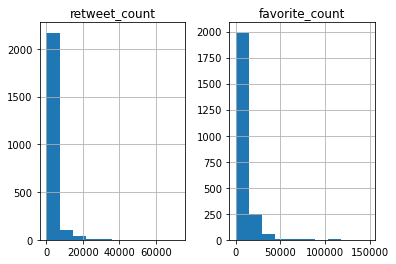

In [173]:
twitter_df.hist();

   ## The Third Dataframe: Twitter Retweet & Favorite Count

**Visual Assessment**

In [174]:
# Taking a quick look at the dataset
twitter_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7168,34466
1,892177421306343426,5388,29884
2,891815181378084864,3553,22499
3,891689557279858688,7383,37667
4,891327558926688256,7926,35980


In [175]:
# Looking over random samples of the dataset several times
twitter_df.sample(10)

,tweet_id,retweet_count,favorite_count
83,876484053909872640,2042,16885
451,817056546584727552,1563,8303
1203,713411074226274305,1217,4183
1208,712668654853337088,1128,3916
86,875144289856114688,4227,19759
1095,730573383004487680,1976,4569
259,840761248237133825,1647,0
914,752932432744185856,6451,12008
1801,676237365392908289,257,1118
1277,707411934438625280,562,2179


**Programmatic Assessment**

In [176]:
# Since I created this dataframe myself it's expected that it should be fine
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2328 non-null   object
 1   retweet_count   2328 non-null   int64 
 2   favorite_count  2328 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


### Quality issues
1. retweeted_status_id, retweeted_status_user_id, and retweeted_statsus_timestamp columns in dogs_df are columns related to duplicated data, not originals. These columns are not needed since I only want original tweets but simply reposts.

2. Timestamp columns in dogs_df of type object/string when it should be of type datetime.

3. The dog stages in dogs_df are objects/strings when they really should be categories.

4. The source column in dog_df contains some of the HTML anchor tag syntax still instead of just the text.

5. tweet_id, in the dogs_df and image_pred_df, and img_num columns in the image_pred_df dataframe are of type int64 when they should be objects/strings.

6. p1, p2, p3 column values in image_pred_df have inconsistent casing and should have spaces instead of underscores.

7. Some of the denominators in the rating_denominator column weren't properly extracted and thus are not set to their proper values.

8. Some dogs don't have None or simply just "a" as a name due to what seems like extraction issues for the dogs_df dataframe.


### Tidiness Issues
1. Doggo, floofer, pupper, puppo columns in dogs_df should be one column instead of multiple columns.

2. All three datasets need to be joined together to form a complete dataset.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [177]:
# Make copies of original pieces of data
dogs_clean = dogs_df.copy()
image_pred_clean = image_pred_df.copy()
twitter_clean = twitter_df.copy()

### Issue #1: Duplicated data that is represented as original data

#### Define: Retweet related columns contain unecessary/duplicted data that is represented as original data. These columns should be filtered out of the dataframe w/ the rows left in being assigned to the cleaned dataframe. This applies for replies and retweets. After filtering I can drop the reply and retweet related columns.

#### Code

In [178]:
dogs_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None


In [179]:
dogs_clean = dogs_df[(dogs_df.loc[:,:].in_reply_to_status_id.isnull()==True) & (dogs_df.loc[:,:].retweeted_status_id.isnull()==True)]

In [180]:
dogs_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [181]:
dogs_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

/Users/Chad/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Test

In [182]:
dogs_clean.shape

(2097, 12)

In [183]:
dogs_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [184]:
dogs_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None


### Issue #2:

#### Define The timestamp column in dogs_df needs is of datatype object when it should be of datatype datetime. Use pd.to_datetime() to make this change.

#### Code

In [185]:
dogs_clean['timestamp'] = pd.to_datetime(dogs_clean['timestamp'])

<ipython-input-185-cae41ec3bd44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogs_clean['timestamp'] = pd.to_datetime(dogs_clean['timestamp'])


#### Test

In [186]:
# Check datatypes to ensure the change was made
dogs_clean.dtypes

tweet_id              int64              
timestamp             datetime64[ns, UTC]
source                object             
text                  object             
expanded_urls         object             
rating_numerator      int64              
rating_denominator    int64              
name                  object             
doggo                 object             
floofer               object             
pupper                object             
puppo                 object             
dtype: object

### Issue #3: Doggo, floofer, pupper, puppo columns in dogs_df should be one column instead of multiple columns.

**Define: The doggo, fluffer, puppo, and pupper columns each represent  category of dog stage and should be combined into one column for tidiness. I'll make a new column for this and drop the old columns as they won't be needed.**

**Code:**

In [187]:
#dogs_clean['dog_stage'] = dogs_clean.text.str.extract('(doggo |floofer |pupper |puppo)', expand = True)

In [188]:
#dogs_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

In [189]:
# Replacing values of each dog stage
dogs_clean.doggo.replace('None', '', inplace=True)
dogs_clean.doggo.replace(np.NaN, '', inplace=True)

/Users/Chad/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4506: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [190]:
dogs_clean.pupper.replace('None', '', inplace=True)
dogs_clean.pupper.replace(np.NaN, '', inplace=True)

In [191]:
dogs_clean.puppo.replace('None', '', inplace=True)
dogs_clean.puppo.replace(np.NaN, '', inplace=True)

In [192]:
dogs_clean.floofer.replace('None', '', inplace=True)
dogs_clean.floofer.replace(np.NaN, '', inplace=True)

In [193]:
# Check for how the different stages are combined, reset the indexes, and get the counts of combinations
dogs_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1761
1,,,,puppo,23
2,,,pupper,,221
3,,floofer,,,9
4,doggo,,,,72
5,doggo,,,puppo,1
6,doggo,,pupper,,9
7,doggo,floofer,,,1


In [194]:
# Create a new column for the dog stages
dogs_clean['stage'] = dogs_clean.doggo + dogs_clean.floofer + dogs_clean.pupper + dogs_clean.puppo

<ipython-input-194-f7c47ac1c30f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogs_clean['stage'] = dogs_clean.doggo + dogs_clean.floofer + dogs_clean.pupper + dogs_clean.puppo


In [195]:
# Fix the values that are combined and split them out
dogs_clean.loc[dogs_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'

/Users/Chad/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [196]:
dogs_clean.loc[dogs_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'

In [197]:
dogs_clean.loc[dogs_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

In [198]:
# Dropping the old stage columns
dogs_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

/Users/Chad/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


**Test**

In [199]:
# Column names check
dogs_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'stage'],
      dtype='object')

In [200]:
# Column unique values check
dogs_clean.stage.nunique(), dogs_clean.stage.unique()

(8,
 array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo, puppo',
        'doggo, floofer', 'doggo, pupper'], dtype=object))

In [201]:
# Checking the dataframe
dogs_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,


### Issue #4: The dog stages are objects/strings when they really should be categories..

**Define: The dog stages were originally seperated into a multiple object datatype columns when they really should be one column of the categorical datatype.**

**Code:**

In [202]:
dogs_clean.stage = dogs_clean.stage.astype('category')

/Users/Chad/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**Test**

In [203]:
dogs_clean.stage.dtypes

CategoricalDtype(categories=['', 'doggo', 'doggo, floofer', 'doggo, pupper',
                  'doggo, puppo', 'floofer', 'pupper', 'puppo'],
, ordered=False)

In [204]:
dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   stage               2097 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 149.8+ KB


### Issue #5: The source column in dog_df contains some of the HTML anchor tag syntax still instead of just the text.

**Define: The source column contains extraneous HTML tag syntax. The relevant text of what source was used for the tweet needs to be extracted.**

**Code:**

In [205]:
# Create a function to remove the surrounding HTML tags and keep just the resulting string
def remove_tags_extract(string):
    result_string = re.sub('<.*?>','',string)
    return result_string

In [206]:
import regex as re
dogs_clean['source']=dogs_clean['source'].apply(lambda x : remove_tags_extract(x))

<ipython-input-206-7fcf45f451f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogs_clean['source']=dogs_clean['source'].apply(lambda x : remove_tags_extract(x))


**Test**

In [207]:
dogs_clean['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

<AxesSubplot:>

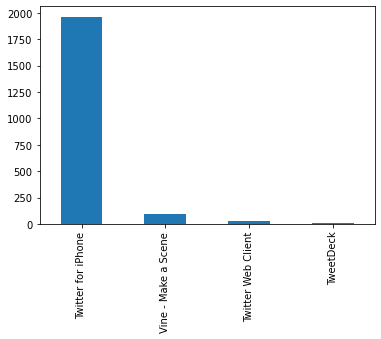

In [208]:
dogs_clean.source.value_counts().plot(kind = 'bar')

### Issue #6: Some of the denominators in the rating_denominator column weren't properly extracted and thus are not set to their proper values

**Define: I'll locate the rating denominators that don't have a value a of 10, visually assess which ones have inaccurate values, and then change then to their appropriate values.**

**Code:**

In [209]:
# Finding out how many rows i'll have to visually assess
dogs_clean.query('rating_denominator != 10')[['text', 'rating_denominator']].shape[0]

17

In [210]:
# Visual assessment of the text and rating_denominator columns
dogs_clean.query('rating_denominator != 10')[['text', 'rating_denominator']]

,text,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",50


In [211]:
# Filtering for just the rows that need to have their values changed
dogs_clean.query('rating_denominator != 10')[['text', 'rating_denominator']].loc[
    [516, 1068, 1165, 1202, 1662, 2335],:]

,text,rating_denominator
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50
1662,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,11
2335,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,2


In [212]:
# Changing the values of the selected rows. np.nan wouldn't work for row index 516 so it was imputed with 10
dogs_clean.at[516,'rating_denominator'] = 10
dogs_clean.at[1068,'rating_denominator'] = 10
dogs_clean.at[1165,'rating_denominator'] = 10
dogs_clean.at[1202,'rating_denominator'] = 10
dogs_clean.at[1662,'rating_denominator'] = 10
dogs_clean.at[2335,'rating_denominator'] = 10

**Test**

In [213]:
# None of the previous rows are in the query
dogs_clean.query('rating_denominator != 10')[['text', 'rating_denominator']]

,text,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",50
1351,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,50
1433,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,40
1635,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,110
1779,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,120


### Issue #7: tweet_id, in the dogs_df and image_pred_df, and img_num columns in the image_pred_df dataframe are of type int64 when they should be objects/strings.

**Define: The datatypes for tweet_id and img_num columns are not appropriate and need to be converted**

**Code:**

In [214]:
image_pred_clean.tweet_id = image_pred_clean.tweet_id.astype('object')

In [215]:
dogs_clean.tweet_id = dogs_clean.tweet_id.astype('object')

/Users/Chad/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [216]:
image_pred_clean.img_num = image_pred_clean.img_num.astype('object')

**Test**

In [217]:
image_pred_clean.info(), dogs_clean.info(), twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   object 
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), object(6)
memory usage: 152.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object         

(None, None, None)

### Issue #8: p1, p2, p3 column values in image_pred_df have inconsistent casing and should have spaces instead of underscores

**Define: p1, p2, p3 column values in image_pred_df have inconsistent casing and should have spaces instead of underscores. I'll fix this issue by applying an anoymous function over the column series.**

**Code:**

In [218]:
image_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [219]:
image_pred_clean.p1 = image_pred_clean.p1.str.replace('_', ' ')
image_pred_clean.p1 = image_pred_clean.p1.str.title()

In [220]:
image_pred_clean.p2 = image_pred_clean.p2.str.replace('_', ' ')
image_pred_clean.p2 = image_pred_clean.p2.str.title()

In [221]:
image_pred_clean.p3 = image_pred_clean.p3.str.replace('_', ' ')
image_pred_clean.p3 = image_pred_clean.p3.str.title()

**Test**

In [222]:
image_pred_clean.loc[0:5, ['p1', 'p2', 'p3']]

,p1,p2,p3
0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2,German Shepherd,Malinois,Bloodhound
3,Rhodesian Ridgeback,Redbone,Miniature Pinscher
4,Miniature Pinscher,Rottweiler,Doberman
5,Bernese Mountain Dog,English Springer,Greater Swiss Mountain Dog


### Issue #9: Some dogs don't have None or simply just "a" as a name due to what seems like extraction issues for the dogs_df dataframe

**Define: There isn't a standardized way in which each tweet is written out and thus there isn't a standard way of extracting name properly. Instead, I'll replace the names with NaN values.**

**Code:**

In [223]:
def set_to_nan(a_value):
    if a_value == "a" or a_value == 'None':
        a_value = np.nan
    return a_value

In [224]:
dogs_clean.name = dogs_clean.name.apply(lambda x : set_to_nan(x))

/Users/Chad/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**Test**

In [225]:
# Check the most common dog names
dogs_clean.name.value_counts(dropna=False)

NaN        658
Lucy       11 
Charlie    11 
Oliver     10 
Cooper     10 
           .. 
Jordy      1  
Kyro       1  
Oreo       1  
Torque     1  
Cecil      1  
Name: name, Length: 954, dtype: int64

In [226]:
dogs_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,


### Issue #10: All three datasets need to be joined together to form a complete dataset.

**Define: I'll perform an inner join on all three datasets to make one complete dataset for all variables and rows**

**Code:**

In [227]:
# Merging two datasets together
twitter_archive_merged = pd.merge(dogs_clean, image_pred_clean, 
                                  left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')

In [228]:
twitter_archive_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1392 non-null   object             
 8   stage               1971 non-null   category           
 9   jpg_url             1971 non-null   object             
 10  img_num             1971 non-null   object             
 11  p1                  1971 non-null   object             
 12  p1_conf             1971 non-null 

**Test**

In [229]:
# Checking datatypes across all 3 datasets because of an earlier issue with merging
dogs_clean.info(), image_pred_clean.info(), twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1439 non-null   object             
 8   stage               2097 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 214.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Cou

(None, None, None)

In [230]:
# Checking the values for the newly merged dataframe
for val in twitter_archive_merged.tweet_id:
    print(type(val))
    break

<class 'int'>


In [231]:
# Checking the values for a the earlier created dataframe
for val in twitter_clean.tweet_id:
    print(type(val))
    break

<class 'str'>


In [232]:
# Seeing if there are any common values between the two
common = [val for val in twitter_archive_merged.tweet_id.values if val in twitter_clean.tweet_id.values]
print(f'''obs in tweet_id: {len(twitter_archive_merged.tweet_id.values)}, number in common {len(common)}''')

obs in tweet_id: 1971, number in common 0


In [233]:
# Earlier datatype change used the argument 'object' which seemed to have caused merging complications
twitter_archive_merged.tweet_id = twitter_archive_merged.tweet_id.astype('string')

In [234]:
# Merging for a master dataset
twitter_archive_master = pd.merge(twitter_clean, twitter_archive_merged, how = 'inner', sort = False)

In [235]:
# Checking for a filled dataset and datatypes
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1963 non-null   object             
 1   retweet_count       1963 non-null   int64              
 2   favorite_count      1963 non-null   int64              
 3   timestamp           1963 non-null   datetime64[ns, UTC]
 4   source              1963 non-null   object             
 5   text                1963 non-null   object             
 6   expanded_urls       1963 non-null   object             
 7   rating_numerator    1963 non-null   int64              
 8   rating_denominator  1963 non-null   int64              
 9   name                1385 non-null   object             
 10  stage               1963 non-null   category           
 11  jpg_url             1963 non-null   object             
 12  img_num             1963 non-null 

In [236]:
# Checking for an earlier issue of duplicated columns
twitter_archive_master.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [237]:
# A glance at some of the data
twitter_archive_master.head()

,tweet_id,retweet_count,favorite_count,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,7168,34466,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,5388,29884,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,3553,22499,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,7383,37667,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,...,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,7926,35980,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,...,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [238]:
dogs_clean.to_csv('twitter_archive_master.csv', index = False)

In [239]:
twitter_archive_master.columns

Index(['tweet_id', 'retweet_count', 'favorite_count', 'timestamp', 'source',
       'text', 'expanded_urls', 'rating_numerator', 'rating_denominator',
       'name', 'stage', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

Some points of interest are:
1. Ratings by dog stage

2. Ratings by predicted breed

3. Confidence level amongst predicted breed


Some problems:
There are so many predicted dog breeds that even with grouping its easy to get lost in all the comparisons. Within the predicted breeds are many predictions that aren't dog breeds that add noise to the data and make it more difficult to discern the information at hand.

In [240]:
dogs_clean.columns, image_pred_clean.columns, twitter_clean.columns

(Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
        'rating_numerator', 'rating_denominator', 'name', 'stage'],
       dtype='object'),
 Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
        'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
       dtype='object'),
 Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object'))

In [241]:
# Importing matplotlib for visualization purposes
import matplotlib.pyplot as plt
%matplotlib inline

In [242]:
# Most retweeted tweet
twitter_archive_master.query('retweet_count == retweet_count.max()')

,tweet_id,retweet_count,favorite_count,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
762,744234799360020481,72512,147752,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13,10,NaN,...,1,Labrador Retriever,0.825333,True,Ice Bear,0.044681,False,Whippet,0.018442,True


In [243]:
# Most favorited tweet
twitter_archive_master.query('favorite_count == favorite_count.max()')

,tweet_id,retweet_count,favorite_count,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
762,744234799360020481,72512,147752,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13,10,NaN,...,1,Labrador Retriever,0.825333,True,Ice Bear,0.044681,False,Whippet,0.018442,True


In [248]:
# Import necessary modules to display pictures
import requests
import IPython.display as Disp
most_retweeted_dog = 'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg'

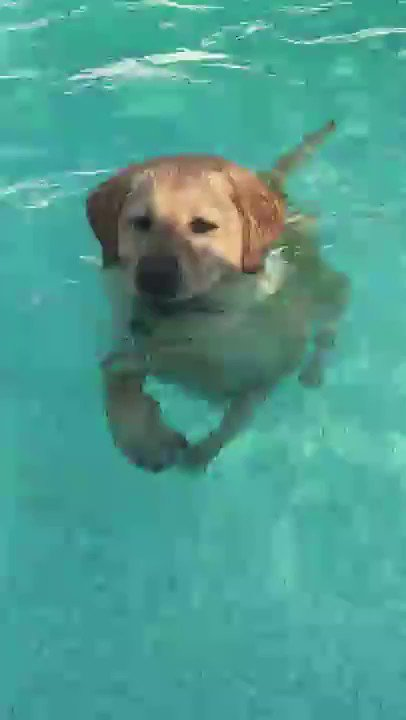

In [249]:
# Display the image
Disp.Image(requests.get(most_retweeted_dog).content)

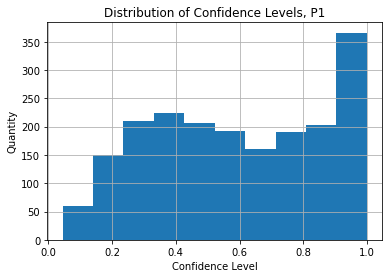

In [296]:
# The distribution of confidence levels 
twitter_archive_master.p1_conf.hist();
plt.title('Distribution of Confidence Levels, P1');
plt.ylabel('Quantity');
plt.xlabel('Confidence Level');
plt.savefig('neural_dist_p1.jpg')

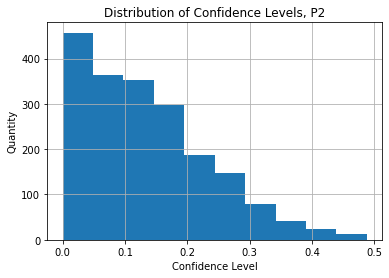

In [297]:
# The distribution of confidence levels 
twitter_archive_master.p2_conf.hist();
plt.title('Distribution of Confidence Levels, P2');
plt.ylabel('Quantity');
plt.xlabel('Confidence Level');
plt.savefig('neural_dist_p2.jpg')

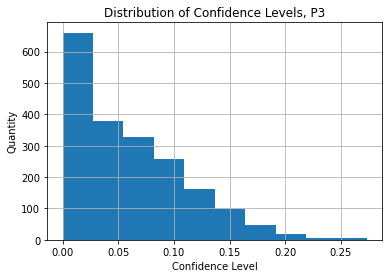

In [298]:
# The distribution of confidence levels 
twitter_archive_master.p3_conf.hist();
plt.title('Distribution of Confidence Levels, P3');
plt.ylabel('Quantity');
plt.xlabel('Confidence Level');
plt.savefig('neural_dist_p3.jpg')

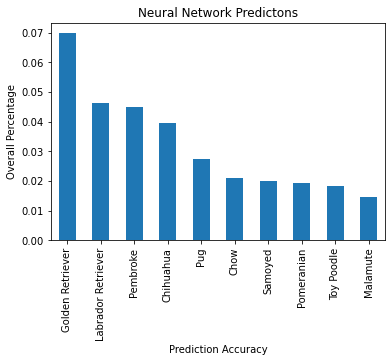

In [294]:
# Counts of true and false predictions by the AI configured as a proportion
twitter_archive_master.p1.value_counts(normalize=True)[:10].plot(kind = 'bar');
plt.title('Neural Network Predictons');
plt.ylabel('Overall Percentage');
plt.xlabel('Prediction Accuracy');
plt.savefig('best_breed_predic.jpg')

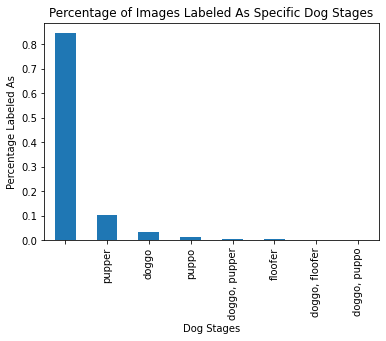

In [254]:
# Visualizing the value counts for the four types of dog stages
twitter_archive_master.stage.value_counts(normalize=True).plot(kind = 'bar');
plt.ylabel('Percentage Labeled As');
plt.xlabel('Dog Stages');
plt.title('Percentage of Images Labeled As Specific Dog Stages');

In [255]:
# The counts of the top predicted breeds
twitter_archive_master.p1.value_counts()[:10]

Golden Retriever      137
Labrador Retriever    91 
Pembroke              88 
Chihuahua             78 
Pug                   54 
Chow                  41 
Samoyed               39 
Pomeranian            38 
Toy Poodle            36 
Malamute              29 
Name: p1, dtype: int64

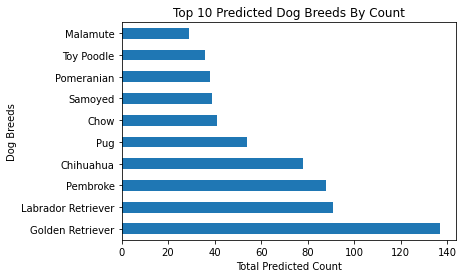

In [256]:
# Visualizing the top 10 predicted breeds
twitter_archive_master.p1.value_counts()[:10].plot.barh();
plt.title('Top 10 Predicted Dog Breeds By Count');
plt.ylabel('Dog Breeds');
plt.xlabel('Total Predicted Count');

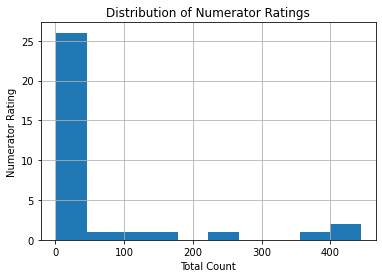

In [295]:
# Visualizing the distribution of the numerator ratings given to all the dogs
twitter_archive_master.rating_numerator.value_counts().hist();
plt.title('Distribution of Numerator Ratings');
plt.ylabel('Numerator Rating');
plt.xlabel('Total Count');
plt.savefig('val_counts_hist.jpg')

In [258]:
# Mapping out the correlation between retweet count and favorite count
twitter_archive_master.corr().style.background_gradient(cmap = 'coolwarm')

,retweet_count,favorite_count,rating_numerator,rating_denominator,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog
retweet_count,1.000000,0.928199,0.019072,-0.016675,0.047241,0.000800,-0.014167,0.012517,-0.038401,0.005408
favorite_count,0.928199,1.000000,0.016770,-0.023667,0.069548,0.042188,-0.016211,0.052316,-0.046193,0.033764
rating_numerator,0.019072,0.016770,1.000000,0.184841,-0.006999,-0.030792,-0.019751,-0.036241,-0.004223,-0.030879
rating_denominator,-0.016675,-0.023667,0.184841,1.000000,0.012213,-0.006344,-0.038343,-0.007848,-0.006749,-0.002083
p1_conf,0.047241,0.069548,-0.006999,0.012213,1.000000,0.127061,-0.511022,0.142213,-0.707314,0.118888
p1_dog,0.000800,0.042188,-0.030792,-0.006344,0.127061,1.000000,0.110839,0.640160,0.049916,0.560674
p2_conf,-0.014167,-0.016211,-0.019751,-0.038343,-0.511022,0.110839,1.000000,0.096856,0.481933,0.064919
p2_dog,0.012517,0.052316,-0.036241,-0.007848,0.142213,0.640160,0.096856,1.000000,0.033872,0.559345
p3_conf,-0.038401,-0.046193,-0.004223,-0.006749,-0.707314,0.049916,0.481933,0.033872,1.000000,0.035461
p3_dog,0.005408,0.033764,-0.030879,-0.002083,0.118888,0.560674,0.064919,0.559345,0.035461,1.000000


### Insights:
1. The most retweeted and favorited dog picture, somewhat surprisingly, was a low quality picture of a puppy in a pool. An assumption I made would be that the most favorited and retweeted picture would be a stunning or very cute or humorous picture of a dog. But for reasons that would require further exploration that isn't the case. The date for this tweet is just 6 months after the creation of the WeRateDogs twitter account which might suggest it is one of the earlier pictures that really made their account go viral.

2. Based on the data at hand, there is quite a high correlation between a picture being retweeted and favorited, as high as .9282. If a person is going to retweet a picture there is a high likelihood that they will also favorite it, and vice-versa.

3. In the case of the predicting and classifying images the neural network produced a substantially higher level of low confidence assessments than it did higher confidence assessments. The distributions for two out of the three levels of prediction confidence - p2, and p3, were right skewed. While p1 saw a more left skewed distribution and high amounts of high confidence predictions. Essentially, this shows that a the neural network saw a lot of images it could be confident about but for it's most confidence predictions but it's second and third predictions saw more less confident predictions when it coulnd't recognize something as clearly. When it came to classifying breeds of dogs the neural network top five best predictions by breed were for Golden Retrievers, Labrador Retrievers, Pembrokes, Chihuahuas, and Pugs, in that order.